In [139]:
using PorousMaterials
using HTTP: request
using Plots: plot, plot!
import JSON

In [62]:
boltzmann = 8.617_333_262e-5 # eV

8.617333262e-5

In [63]:
h2_cnt_forcefield = LJForceField(
    "carbon-hydrogen",
    Dict(:H2 => 2.958),
    Dict(:H2 => .0031/boltzmann),
    Dict(:H2 => Dict(:C => 3.179)),
    Dict(:H2 => Dict(:C => .0028/boltzmann)),
    14.0,
)

Force field: carbon-hydrogen
Number of atoms included: 1
Cut-off radius (Å) = 3.7416573867739413
   H2-   H2 ϵ =   35.97401 K, σ =    2.95800 Å


In [64]:
H2_species = [:H2]
H2_coords = [0 0 0]
H2_atoms = Atoms(0, H2_species, H2_coords)
H2_charges = Charges(Float64[], zeros(0, 0))

LoadError: MethodError: no method matching Atoms(::Int64, ::Vector{Symbol}, ::Matrix{Int64})
[0mClosest candidates are:
[0m  Atoms(::Int64, ::Vector{Symbol}, [91m::T[39m) where T<:Coords at /home/kian/.julia/dev/PorousMaterials/src/matter.jl:130

In [57]:
H2 = Molecule(:H2, H2_atoms, H2_charges)

LoadError: UndefVarError: H2_atoms not defined

In [22]:
crystal = Crystal("SBMOF-1.cif");

Name: SBMOF-1.cif
Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 100.897000 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 11.619300 Å. b = 5.566700 Å, c = 22.931200 Å
	Volume of unit cell: 1456.472102 Å³

	# atoms = 120
	# charges = 0
	chemical formula: Dict(:H => 8, :S => 1, :Ca => 1, :O => 6, :C => 14)
	space Group: P1
	symmetry Operations:
		'x, y, z'


In [40]:
forcefield = LJForceField("UFF", r_cutoff=12.8);

Force field: UFF
Number of atoms included: 108
Cut-off radius (Å) = 12.8
   Ra-   Ra ϵ =  203.30076 K, σ =    3.27583 Å
   Cl-   Cl ϵ =  114.23087 K, σ =    3.51638 Å
   Al-   Al ϵ =  254.12595 K, σ =    4.00815 Å
   Be-   Be ϵ =   42.77367 K, σ =    2.44552 Å
   Re-   Re ϵ =   33.21250 K, σ =    2.63171 Å
   Cr-   Cr ϵ =    7.54830 K, σ =    2.69319 Å
   Na-   Na ϵ =   15.09659 K, σ =    2.65755 Å
   Sb-   Sb ϵ =  225.94565 K, σ =    3.93777 Å
   Cf-   Cf ϵ =    6.54186 K, σ =    2.95155 Å
   Kr-   Kr ϵ =  110.70833 K, σ =    3.68921 Å
   Ni-   Ni ϵ =    7.54830 K, σ =    2.52481 Å
    S-    S ϵ =  137.88220 K, σ =    3.59478 Å
  CH4-  CH4 ϵ =  148.00000 K, σ =    3.73000 Å
   Fm-   Fm ϵ =    6.03864 K, σ =    2.92749 Å
   Ru-   Ru ϵ =   28.18030 K, σ =    2.63973 Å
   Tl-   Tl ϵ =  342.18940 K, σ =    3.87274 Å
   re-   re ϵ =    0.00010 K, σ =    5.00000 Å
   Tm-   Tm ϵ =    3.01932 K, σ =    3.00589 Å
C_CO2-C_CO2 ϵ =   27.00000 K, σ =    2.80000 Å
    W-    W ϵ =   33.71572 K, σ = 

In [41]:
molecule = Molecule("Xe");

Molecule species: Xe
Center of mass (fractional coords): Cart([0.0; 0.0; 0.0])
Atoms:

	atom = Xe, x = [0.000, 0.000, 0.000]

In [95]:
r = request("GET", "https://adsorption.nist.gov/isodb/api/isotherm/10.1021jacs.5b02556.Isotherm1.json")
body = String(r.body)
print(body)


{
    "filename": "10.1021jacs.5b02556.Isotherm1",
    "DOI": "10.1021/jacs.5b02556",
    "articleSource": "Figure 2a",
    "date": "2016-07-05",
    "digitizer": "Yamuna E. Satsangi",
    "adsorbent": {
        "hashkey": "NIST-MATDB-36e6d6fa10ea3bfb7d41432cc77db300",
        "name": "SBMOF-2"
    },
    "adsorbates": [
        {
            "InChIKey": "FHNFHKCVQCLJFQ-UHFFFAOYSA-N",
            "name": "Xenon"
        }
    ],
    "category": "exp",
    "temperature": 298,
    "tabular_data": 0,
    "isotherm_type": "",
    "adsorptionUnits": "mmol/kg",
    "pressureUnits": "bar",
    "compositionType": "molefraction",
    "concentrationUnits": "",
    "isotherm_data": [
        {
            "pressure": 0,
            "total_adsorption": 0,
            "species_data": [
                {
                    "InChIKey": "FHNFHKCVQCLJFQ-UHFFFAOYSA-N",
                    "composition": 1,
                    "adsorption": 0
                }
            ]
        },
        {
        

In [125]:
json = JSON.Parser.parse(body)
pressures = [d["pressure"] for d in json["isotherm_data"]]
pressures = convert(Array{Float64}, pressures)
adsorption_data = [d["total_adsorption"] for d in json["isotherm_data"]];

In [114]:
results = stepwise_adsorption_isotherm(crystal, molecule, 298., pressures, forcefield, n_burn_cycles=5000, n_sample_cycles=5000);

Simulating (μVT) adsorption of Xe in SBMOF-1.cif at 298.000000 K and 0.000000 bar (bar) with UFF force field.
	# burn cycles: 5000
	# sample cycles: 5000
	ideal equation of state fugacity = 0.000000 bar
	the crystal:
		replicated (3,5,2) for short-range cutoff of 12.800000 Å
		density [kg/m³]: 1698.6777753402391
		chemical formula: Dict(:H => 8, :S => 1, :Ca => 1, :O => 6, :C => 14)
		# atoms: 3600
		# point charges: 0
	the molecule:
		unique species: [:Xe]
		# atoms: 1
		# point charges: 0
	Markov chain proposals:
		probability of insertion: 0.350000
		probability of deletion: 0.350000
		probability of translation: 0.250000
		probability of rotation: 0.000000
		probability of reinsertion: 0.050000
	Block  1/5 statistics:
	# samples: 20000
	⟨N⟩ (molecules) = 0.0
	⟨U_gh, vdw⟩ (K) = 0.0
	⟨U_gh, Coulomb⟩ (K) = 0.0
	⟨U_gg, vdw⟩ (K) = 0.0
	⟨U_gg, Coulomb⟩ (K) = 0.0
	⟨U⟩ (K) = 0.0
	Block  2/5 statistics:
	# samples: 20000
	⟨N⟩ (molecules) = 0.0
	⟨U_gh, vdw⟩ (K) = 0.0
	⟨U_gh, Coulomb⟩ (K) = 0

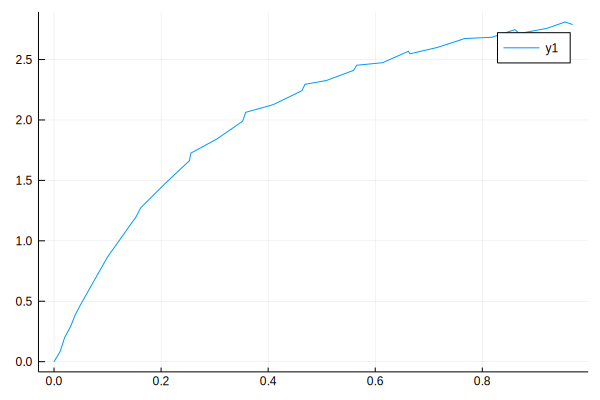

In [145]:
#plot(pressures, [r["⟨N⟩ (mmol/g)"] for r in results])
plot(pressures, adsorption_data)